# Analysis of the KNNBasic algorithm

In this notebook, we will run a basic neighborhood algorithm on the movielens dataset, dump the results, and use pandas to make some data analysis.

1. 데이터 불러옴
2. train test split, 근데 surprise엔 없어서 fold써야 함
3. 알고리즘 import, 인스턴스화
4. fit / test 

In [2]:
# from __future == python2에서만 사용
import pickle  # 모델 저장 안하면 매 번 학습해야 한다. vars에 저장된 값을 저장시킴

import pandas as pd

from surprise import KNNBasic
from surprise import Dataset                                                     
from surprise import dump
from surprise.accuracy import rmse

In [3]:
# 파일읽기 pandas로만..!

# data불러오기
data = Dataset.load_builtin('ml-100k')
# 보통 tidy data와 형태가 다르다.

# pandas data-frame으로부터 읽기
# data = Dataset.load_from_df()

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/joey/.surprise_data/ml-100k


In [4]:
data.folds()
# scikit에서 train test split와 같은 역할
# train data, test data로 쪼개짐
# 큰 데이터에서 효율적으로 사용 가능하므로 generator사용함

# option이 없음..! 알아서 split해줌

<generator object Dataset.folds at 0x11ba09390>

In [5]:
for train, test in data.folds():
    print(train)
# 5조각으로 나눔

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


In [16]:
from surprise import KNNBasic  # collaborative filter : 나하고 가장 가까운 사람의 과거와 나의 과거를 통해서 추천해주는 알고리즘
from surprise import SVD

In [17]:
algo = KNNBasic()
svd = SVD()  # netflix에서 쓰는 알고리즘 : 성능 좋다.

In [14]:
from surprise.accuracy import rmse  # root mean square error

In [19]:
for train, test in data.folds():
    algo.fit(train) 
    svd.fit(train)
    test_ = algo.test(test)  # surprise에는 score가 없지만 test가 있다.
    test_svd = svd.test(test)
    rmse(test_)  # 작으면 작을수록 좋다. 정확도랑 다른 것 같다.
    rmse(test_svd)
    # rmse옵션에서 : verboase : 밑에 로그를 보여주는 옵션
    
# 학습시키는 데이터가 많을수록 좋다. 하지만 overfitting의 문제가 있을수도 있다. learning curve확인해보기
# 하나의 모델에 데이터 계속 넣어서 계속 학습시킴 == 모델이 하나임
# 다시 처음부터 학습시킬 필요가 없다.

# 학습시키는 방식
# batch방식 : 일정량 쌓이면 학습시킴
# online방식 : 데이터 들어올 때마다 학습    
    
# model은 현실에 대한 단순화하기 위해서 가정을 해야 한다.
# 모델에 대한 정확도는 assumption에 예민함... 오차율 영향이 많음  == 불확실성이 커짐 
# == 가정이 틀릴 가능성이 있다, 불확실성을 처리하기 위해서 데이터를 가공한다. == outlier 제거 & normalization해줘야 함
# 데이터가 정답이라는 가정이 있음 하지만 rating데이터는 정답이 없다(게다가 주관적). == overfitting 사실을 확인하기 어렵다.
# rating 데이터가 정확하다는 가정 하에 모델을 만듦 : 사실은 주관적이지만... (모델은 가정하에 만든다.)
# uncertainty principle : 불확정성 원리
# 불확정성 원리를 최소화하기 위해서 확률을 사용함

# 데이터가 그나마 객관적이라는 증거를 보여줘야 함 == pandas로 기초통계분석을 통해서...  
# 일부러 평점테러하는 사람 & 평점 짜게주는 사람이 있어서 outlier 제거 & normalization해줘야 함

# 의료예측과 달리 추천 시스템은 틀려도 괜찮음..! == 정확도를 안따짐 == 애초에 정확도가 높을 수가 없다.

# 데이터에 외부 영향이 많을 때 예측하는 거 어려움...! 
# iris data는 외부 영향을 덜 받아서 예측 잘됨 & 객관적인 데이터
# 외부 영향을 줄이기 위해서 데이터를 많이 모음

# 데이터의 불확실성이 크기 때문에 정확도만 높다고 알고리즘을 선택하면 안된다. svd정확도가 높구만..!
# 정확도를 객관화 할 수 없기 때문이다.

# 불확실성이 크기 때문에 hyper-parameter를 정하는 결정권자가 있어야 한다.

# 불확실한 데이터는 예측할 가능성이 낮다.
# 영상 데이터는 덜 불확실한데, labeling이 불확실한 요인

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9752
RMSE: 0.9354
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9734
RMSE: 0.9279
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9843
RMSE: 0.9414
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9769
RMSE: 0.9321
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9845
RMSE: 0.9425


In [ ]:
# dump사용해서 알고리즘하고 모델을 저장한다.

In [8]:
# 데이터 불러온 다음에 train test split해야 함

# We'll use a basic nearest neighbor approach, where similarities are computed
# between users.
algo = KNNBasic()                                                       

for trainset, testset in data.folds(): 
    algo.train(trainset)                             
    predictions = algo.test(testset)
    rmse(predictions)
                                                                               
    dump.dump('./dump_file', predictions, algo)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9889


In [10]:
# The dump has been saved and we can now use it whenever we want.
# Let's load it and see what we can do
predictions, algo = dump.load('./dump_file')

In [12]:
trainset = algo.trainset
print('algo: {0}, k = {1}, min_k = {2}'.format(algo.__class__.__name__, algo.k, algo.min_k))

algo: KNNBasic, k = 40, min_k = 1


In [13]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [14]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1,6,5.0,3.468613,"{'actual_k': 20, 'was_impossible': False}",135,20,1.531387
1,1,10,3.0,3.866290,"{'actual_k': 40, 'was_impossible': False}",135,73,0.866290
2,1,12,5.0,4.538194,"{'actual_k': 40, 'was_impossible': False}",135,211,0.461806
3,1,14,5.0,4.235741,"{'actual_k': 40, 'was_impossible': False}",135,140,0.764259
4,1,17,3.0,3.228002,"{'actual_k': 40, 'was_impossible': False}",135,72,0.228002


In [15]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [16]:
# Let's take a look at the best predictions of the algorithm
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
272,5,439,1.0,1.0,"{'actual_k': 3, 'was_impossible': False}",91,3,0.0
886,13,314,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",373,2,0.0
156,2,314,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",40,2,0.0
926,13,437,1.0,1.0,"{'actual_k': 3, 'was_impossible': False}",373,3,0.0
9276,206,314,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",33,2,0.0
19118,405,437,1.0,1.0,"{'actual_k': 3, 'was_impossible': False}",582,3,0.0
8032,181,1334,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",218,1,0.0
8041,181,1354,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",218,1,0.0
9202,201,1424,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",215,1,0.0
3018,60,1123,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",119,1,0.0


It's interesting to note that these perfect predictions are actually lucky shots: $|U_i|$ is always very small, meaning that very few users have rated the target item. This implies that the set of neighbors is very small (see the ``actual_k`` field)... And, it just happens that all the ratings from the neighbors are the same (and mostly, are equal to that of the target user).

This may be a bit surprising but these lucky shots are actually very important to the accuracy of the algorithm... Try running the same algorithm with a value of ``min_k`` equal to $10$. This means that if there are less than $10$ neighbors, the prediction is set to the mean of all ratings. You'll see your accuracy decrease!

In [17]:
# Now, let's look at the prediction with the biggest error
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
9406,208,302,1.0,4.308447,"{'actual_k': 40, 'was_impossible': False}",11,245,3.308447
19089,405,169,1.0,4.364728,"{'actual_k': 40, 'was_impossible': False}",582,97,3.364728
19785,436,132,1.0,4.365369,"{'actual_k': 40, 'was_impossible': False}",126,200,3.365369
157,2,315,1.0,4.381308,"{'actual_k': 40, 'was_impossible': False}",40,136,3.381308
8503,193,56,1.0,4.386478,"{'actual_k': 40, 'was_impossible': False}",61,312,3.386478
5531,113,976,5.0,1.610771,"{'actual_k': 7, 'was_impossible': False}",31,7,3.389229
7917,181,408,1.0,4.421499,"{'actual_k': 40, 'was_impossible': False}",218,93,3.421499
7390,167,169,1.0,4.664991,"{'actual_k': 40, 'was_impossible': False}",38,97,3.664991
7412,167,1306,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",38,1,4.000000
5553,114,1104,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",27,1,4.000000


Let's focus first on the last two predictions. Well, we can't do much about them. We should have predicted $5$, but the only available neighbor had a rating of $1$, so we were screwed. The only way to avoid this kind of errors would be to increase the ``min_k`` parameter, but it would actually worsen the accuracy (see note above).

How about the other ones? It seems that for each prediction, the users are some kind of outsiders: they rated their item with a rating of $1$ when the most of the ratings for the item where high (or inversely, rated a *bad* item with a rating of $5$). See the plot below as an illustration for the first rating.

These are situations where baseline estimates would be quite helpful, in order to deal with highly biased users (and items).

<IPython.core.display.Javascript object>


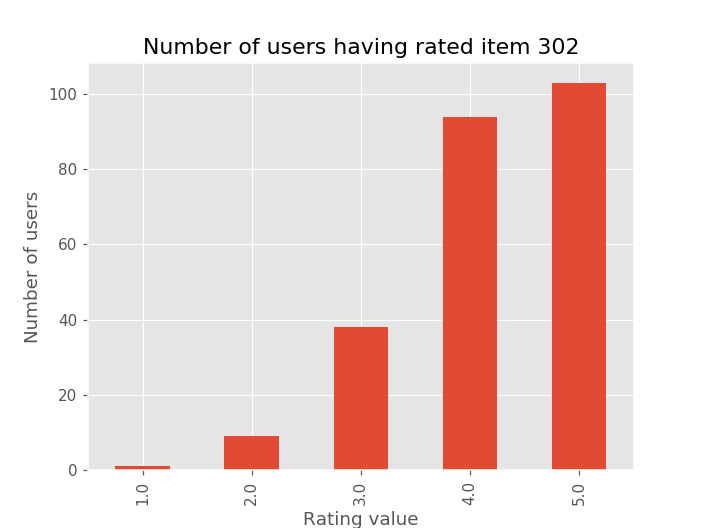

In [19]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item 302')